<a href="https://colab.research.google.com/github/samratapoorv/oasisinfobyte/blob/main/salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
data = pd.read_csv('/content/Advertising.csv')

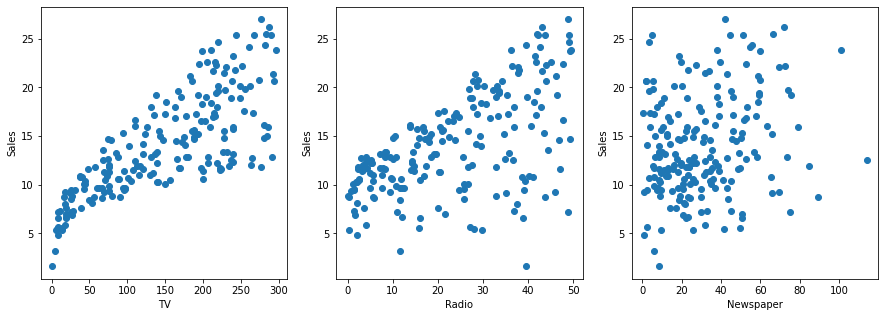

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # create a figure with 1 row and 3 columns of subplots
axs[0].scatter(data['TV'], data['Sales'])  # scatter plot of TV vs Sales
axs[0].set_xlabel('TV')  # x-axis label for the first subplot
axs[0].set_ylabel('Sales')  # y-axis label for the first subplot
axs[1].scatter(data['Radio'], data['Sales'])  # scatter plot of Radio vs Sales
axs[1].set_xlabel('Radio')  # x-axis label for the second subplot
axs[1].set_ylabel('Sales')  # y-axis label for the second subplot
axs[2].scatter(data['Newspaper'], data['Sales'])  # scatter plot of Newspaper vs Sales
axs[2].set_xlabel('Newspaper')  # x-axis label for the third subplot
axs[2].set_ylabel('Sales')  # y-axis label for the third subplot
plt.show()  # show the plot


In [30]:
print(data)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(data[['TV', 'Radio', 'Newspaper']], data['Sales'], test_size=0.2, random_state=42)

In [32]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [33]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R^2: {r2:.2f}')

MSE: 0.75
MAE: 0.68
R^2: 0.98


In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

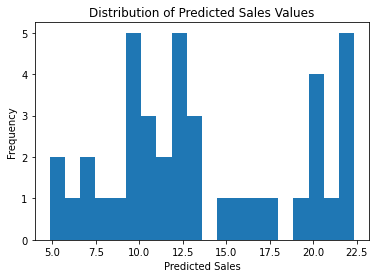

In [35]:
plt.hist(y_pred, bins=20)  # create a histogram of the predicted sales values
plt.xlabel('Predicted Sales')  # x-axis label for the plot
plt.ylabel('Frequency')  # y-axis label for the plot
plt.title('Distribution of Predicted Sales Values')  # title for the plot
plt.show()  # show the plot

In [36]:
new_data = pd.DataFrame({
    'TV': [100, 200, 300],
    'Radio': [20, 30, 40],
    'Newspaper': [5, 10, 15]
})

In [37]:
new_sales = model.predict(new_data)
print(new_sales)

[11.66437924 18.40750954 24.08250909]


Text(0.5, 1.0, 'Actual vs. Predicted Sales')

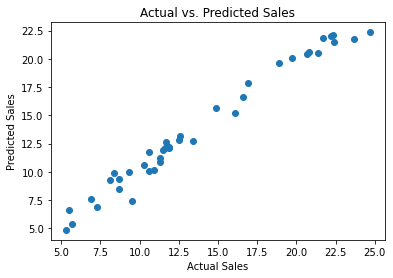

In [38]:
plt.scatter(y_test, y_pred)  # scatter plot of actual vs. predicted sales
plt.xlabel('Actual Sales')  # x-axis label for the plot
plt.ylabel('Predicted Sales')  # y-axis label for the plot
plt.title('Actual vs. Predicted Sales')

In [39]:
future_data = pd.DataFrame({'TV': [150, 200, 250], 'Radio': [20, 30, 40], 'Newspaper': [5, 10, 15]})
future_sales = model.predict(future_data)
print(future_sales)

[14.36050194 18.40750954 22.96560709]


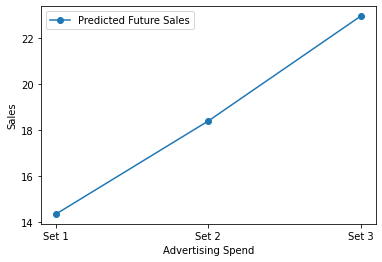

In [40]:
fig, ax = plt.subplots()
ax.plot(future_data.index, future_sales, marker='o', label='Predicted Future Sales')
ax.set_xticks(future_data.index)
ax.set_xticklabels(['Set 1', 'Set 2', 'Set 3'])
ax.set_xlabel('Advertising Spend')
ax.set_ylabel('Sales')
ax.legend()
plt.show()